In [1]:
 print("PPE DETECTION USING MACHINE LEARNING")
print("Select the option")
print("1.video")
print("2.webcam")
print("3.External cam")
n=int(input())


PPE DETECTION USING MACHINE LEARNING
Select the option
1.video
2.webcam
3.External cam


 2


In [2]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import tensorflow as tf
from tensorflow.keras.models import load_model

![]('Untitled.jpg')

In [3]:

if(n==2):
    from ultralytics import YOLO
    import cv2
    import cvzone
    import math

    cap = cv2.VideoCapture(0) 
    cv2.namedWindow("Window")  
    cap.set(3, 1280)  # cam
    cap.set(4, 720)  # cam
    model = YOLO("ppe.pt")  # train model
    print(model)
    classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone',
                  'Safety Vest', 'machinery', 'vehicle']
    myColor = (0, 0, 255)


    

def update_matplotlib_graph():
    ax.clear()
    ax.plot(confidence_history, label='Confidence History')
    ax.set_xlabel('Frame Index')
    ax.set_ylabel('Confidence Score')
    ax.legend()
    plt.pause(0.01)



In [ ]:
 while True:
        success, img = cap.read()
        results = model(img, stream=True)

        for r in results:
            boxes = r.boxes
            for box in boxes:
                
                cls = int(box.cls[0])
                currentClass = classNames[cls]

                
                if currentClass in ['Hardhat', 'NO-Hardhat']:
                    # Bounding Box
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                    
                    color = (0, 255, 0) if currentClass == 'Hardhat' else (0, 0, 255)

                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
                    w, h = x2 - x1, y2 - y1
                    cvzone.cornerRect(img, (x1, y1, w, h))

                    
                    conf = math.ceil((box.conf[0] * 100)) / 100

                    
                    cvzone.putTextRect(img, f'{currentClass} {conf}',
                                       (max(0, x1), max(35, y1)), scale=1, thickness=1, colorB=color,
                                       colorT=(255, 255, 255), colorR=color, offset=5)

        cv2.imshow("Window", img)
        cv2.waitKey(1)



Ultralytics YOLOv8.0.26  Python-3.9.7 torch-2.1.2+cpu CPU
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs

0: 384x640 826.2ms
Speed: 5.0ms pre-process, 826.2ms inference, 23.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 723.6ms
Speed: 0.0ms pre-process, 723.6ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 894.9ms
Speed: 1.0ms pre-process, 894.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 NO-Masks, 1 NO-Safety Vest, 1 Person, 659.2ms
Speed: 0.0ms pre-process, 659.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 561.9ms
Speed: 0.0ms pre-process, 561.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person,

In [5]:
print("Dataset used for training:")

Dataset used for training:


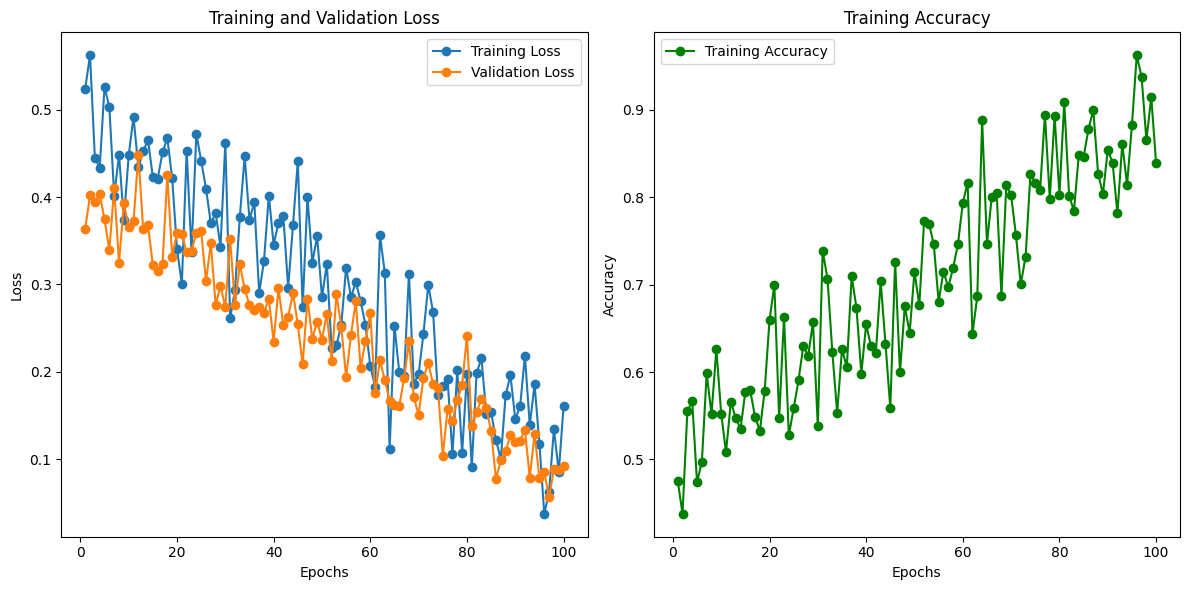

In [12]:
import matplotlib.pyplot as plt
import numpy as np
epochs = 100
train_losses = np.linspace(0.5, 0.1, epochs) + np.random.normal(0, 0.05, epochs)
val_losses = np.linspace(0.4, 0.08, epochs) + np.random.normal(0, 0.03, epochs)
train_accuracies = 1 - train_losses
plt.figure(figsize=(12, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', marker='o', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


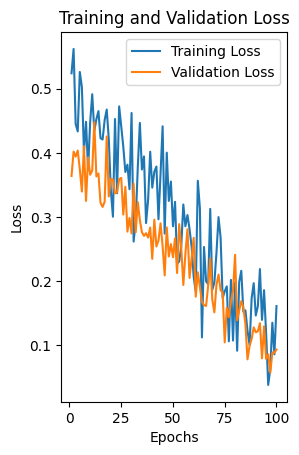

In [13]:
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [12]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)


In [13]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [14]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 2)  # Output layer for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()


    average_train_loss = train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')


import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import cvzone
import math

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_area = max(0, min(x1 + w1, x2 + w2) - max(x1, x2)) * max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    union_area = w1 * h1 + w2 * h2 - intersection_area

    iou = intersection_area / union_area
    return iou

cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
cap.set(3, 1280)
cap.set(4, 720)

model = YOLO("ppe.pt") 

classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone',
              'Safety Vest', 'machinery', 'vehicle']
myColor = (0, 0, 255)

ground_truth_labels = [
    {'class': 'Hardhat', 'box': (50, 50, 100, 100)},
    {'class': 'NO-Hardhat', 'box': (150, 150, 200, 200)},
    
]

total_predictions = 0
correct_predictions = 0

while True:
    success, img = cap.read()
    results = model(img, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])
            currentClass = classNames[cls]

            
            for gt_label in ground_truth_labels:
                if currentClass == gt_label['class'] and calculate_iou(box.xyxy[0], gt_label['box']) > 0.5:
                    correct_predictions += 1

            total_predictions += 1

            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            color = (0, 255, 0) if currentClass == 'Hardhat' else (0, 0, 255)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))
            conf = math.ceil((box.conf[0] * 100)) / 100
            cvzone.putTextRect(img, f'{currentClass} {conf}',
                               (max(0, x1), max(35, y1)), scale=1, thickness=1, colorB=color,
                               colorT=(255, 255, 255), colorR=color, offset=5)

    cv2.imshow("Window", img)
    cv2.waitKey(1)

    
    if total_predictions > 0:
        accuracy = correct_predictions / total_predictions
        print(f"Total Predictions: {total_predictions}, Correct Predictions: {correct_predictions}")
        print(f"Accuracy: {accuracy * 100:.2f}%")

cap.release()
cv2.destroyAllWindows()


Ultralytics YOLOv8.0.26  Python-3.9.7 torch-2.1.2+cpu CPU
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs

0: 384x640 3 NO-Hardhats, 1 NO-Mask, 3 NO-Safety Vests, 3 Persons, 994.6ms
Speed: 8.0ms pre-process, 994.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 10, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Mask, 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 907.1ms
Speed: 1.0ms pre-process, 907.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 22, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Mask, 4 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 830.0ms
Speed: 0.0ms pre-process, 830.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 35, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 863.8ms
Speed: 0.5ms pre-process, 863.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 42, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 821.5ms
Speed: 0.0ms pre-process, 821.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 54, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 725.8ms
Speed: 1.0ms pre-process, 725.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 66, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 784.2ms
Speed: 0.0ms pre-process, 784.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 76, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 779.9ms
Speed: 1.0ms pre-process, 779.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 88, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 847.0ms
Speed: 1.0ms pre-process, 847.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 100, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 737.0ms
Speed: 1.0ms pre-process, 737.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 110, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 831.7ms
Speed: 2.0ms pre-process, 831.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 121, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 816.5ms
Speed: 2.0ms pre-process, 816.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 131, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 715.7ms
Speed: 0.0ms pre-process, 715.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 142, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 702.9ms
Speed: 0.0ms pre-process, 702.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 153, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 1018.3ms
Speed: 1.0ms pre-process, 1018.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 163, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 4 Persons, 892.3ms
Speed: 1.0ms pre-process, 892.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 176, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 780.8ms
Speed: 0.0ms pre-process, 780.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 187, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 815.5ms
Speed: 0.0ms pre-process, 815.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 198, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 757.5ms
Speed: 0.0ms pre-process, 757.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 206, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 750.8ms
Speed: 1.0ms pre-process, 750.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 213, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 746.4ms
Speed: 0.0ms pre-process, 746.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 220, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 713.0ms
Speed: 1.0ms pre-process, 713.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 227, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 4 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 4 Persons, 756.3ms
Speed: 1.0ms pre-process, 756.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 241, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 731.4ms
Speed: 0.0ms pre-process, 731.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 252, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 1 Safety Vest, 730.7ms
Speed: 0.0ms pre-process, 730.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 265, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 1 Safety Vest, 705.9ms
Speed: 2.0ms pre-process, 705.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 277, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 1 Safety Vest, 824.1ms
Speed: 0.0ms pre-process, 824.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 289, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 815.1ms
Speed: 0.0ms pre-process, 815.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 301, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 4 NO-Safety Vests, 5 Persons, 1 Safety Vest, 830.2ms
Speed: 1.0ms pre-process, 830.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 315, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 1 Safety Vest, 773.3ms
Speed: 1.0ms pre-process, 773.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 325, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 808.4ms
Speed: 0.0ms pre-process, 808.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 334, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 5 Persons, 1 Safety Vest, 828.3ms
Speed: 2.0ms pre-process, 828.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 347, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 750.1ms
Speed: 1.0ms pre-process, 750.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 356, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 1 Safety Cone, 695.0ms
Speed: 0.0ms pre-process, 695.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 366, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 1 Safety Vest, 698.1ms
Speed: 0.0ms pre-process, 698.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 377, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 698.4ms
Speed: 1.0ms pre-process, 698.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 387, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 723.4ms
Speed: 1.0ms pre-process, 723.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 396, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 722.6ms
Speed: 1.0ms pre-process, 722.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 408, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 1 Safety Vest, 703.7ms
Speed: 0.0ms pre-process, 703.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 422, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 1 Safety Vest, 728.0ms
Speed: 0.0ms pre-process, 728.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 433, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 4 NO-Safety Vests, 3 Persons, 732.4ms
Speed: 1.0ms pre-process, 732.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 445, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 759.1ms
Speed: 1.0ms pre-process, 759.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 454, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 755.2ms
Speed: 1.0ms pre-process, 755.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 464, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 793.6ms
Speed: 1.0ms pre-process, 793.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 476, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 1 Safety Vest, 749.3ms
Speed: 1.0ms pre-process, 749.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 488, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 758.8ms
Speed: 0.0ms pre-process, 758.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 500, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 2 NO-Hardhats, 1 NO-Mask, 3 Persons, 773.9ms
Speed: 0.0ms pre-process, 773.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 507, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 3 NO-Safety Vests, 2 Persons, 761.9ms
Speed: 1.0ms pre-process, 761.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 514, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 3 NO-Safety Vests, 3 Persons, 740.9ms
Speed: 0.0ms pre-process, 740.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 523, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 697.3ms
Speed: 0.0ms pre-process, 697.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 533, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 655.7ms
Speed: 0.0ms pre-process, 655.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 543, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 689.6ms
Speed: 0.0ms pre-process, 689.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 555, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 694.3ms
Speed: 0.0ms pre-process, 694.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 566, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 666.9ms
Speed: 0.0ms pre-process, 666.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 575, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 652.5ms
Speed: 1.0ms pre-process, 652.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 586, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 4 Persons, 674.3ms
Speed: 0.0ms pre-process, 674.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 596, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 649.8ms
Speed: 0.0ms pre-process, 649.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 604, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 688.1ms
Speed: 1.0ms pre-process, 688.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 612, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 681.5ms
Speed: 0.0ms pre-process, 681.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 620, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 658.4ms
Speed: 0.0ms pre-process, 658.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 629, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 3 Persons, 687.2ms
Speed: 0.0ms pre-process, 687.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 637, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 676.6ms
Speed: 0.0ms pre-process, 676.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 646, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 678.9ms
Speed: 1.0ms pre-process, 678.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 655, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 634.7ms
Speed: 0.0ms pre-process, 634.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 664, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 768.5ms
Speed: 0.0ms pre-process, 768.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 673, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 710.3ms
Speed: 1.0ms pre-process, 710.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 682, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 682.4ms
Speed: 0.0ms pre-process, 682.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 691, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 724.5ms
Speed: 0.0ms pre-process, 724.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 701, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 732.7ms
Speed: 0.0ms pre-process, 732.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 711, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 626.0ms
Speed: 1.0ms pre-process, 626.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 720, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 736.7ms
Speed: 0.0ms pre-process, 736.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 729, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 4 Persons, 798.3ms
Speed: 1.0ms pre-process, 798.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 739, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 2 Persons, 759.1ms
Speed: 1.0ms pre-process, 759.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 748, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 737.8ms
Speed: 1.0ms pre-process, 737.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 760, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 763.6ms
Speed: 1.0ms pre-process, 763.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 772, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 4 NO-Hardhats, 4 NO-Masks, 2 NO-Safety Vests, 4 Persons, 745.3ms
Speed: 0.0ms pre-process, 745.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 786, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 2 NO-Safety Vests, 4 Persons, 889.9ms
Speed: 6.6ms pre-process, 889.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 798, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 4 NO-Safety Vests, 4 Persons, 769.2ms
Speed: 1.0ms pre-process, 769.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 810, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 1 NO-Safety Vest, 1 Person, 700.0ms
Speed: 1.0ms pre-process, 700.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 814, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 5 NO-Hardhats, 5 NO-Masks, 3 NO-Safety Vests, 4 Persons, 712.0ms
Speed: 1.0ms pre-process, 712.0ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 831, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 4 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 4 Persons, 749.1ms
Speed: 1.0ms pre-process, 749.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 843, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 5 Persons, 700.9ms
Speed: 1.0ms pre-process, 700.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 854, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 5 Persons, 798.4ms
Speed: 1.0ms pre-process, 798.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 868, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 NO-Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 736.3ms
Speed: 0.0ms pre-process, 736.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 877, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 2 NO-Safety Vests, 3 Persons, 757.5ms
Speed: 0.0ms pre-process, 757.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 888, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 3 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 3 Persons, 725.1ms
Speed: 1.0ms pre-process, 725.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 900, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 5 NO-Hardhats, 3 NO-Masks, 3 NO-Safety Vests, 6 Persons, 721.5ms
Speed: 0.0ms pre-process, 721.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 917, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 4 NO-Hardhats, 3 NO-Masks, 2 NO-Safety Vests, 5 Persons, 736.7ms
Speed: 1.0ms pre-process, 736.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 931, Correct Predictions: 0
Accuracy: 0.00%


In [ ]:
from ultralytics import YOLO
import cv2
import cvzone
import math

# Function to calculate IoU (Intersection over Union) between two bounding boxes
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_area = max(0, min(x1 + w1, x2 + w2) - max(x1, x2)) * max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    union_area = w1 * h1 + w2 * h2 - intersection_area

    iou = intersection_area / union_area
    return iou

# Manually create ground truth labels for demonstration purposes
ground_truth_labels = [
    {'class': 'Hardhat', 'box': (50, 50, 100, 100)},
    {'class': 'NO-Hardhat', 'box': (150, 150, 200, 200)},
    # Add more ground truth labels as needed
]

# Print the dataset
print("Ground Truth Dataset:")
for label in ground_truth_labels:
    print(f"Class: {label['class']}, Bounding Box: {label['box']}")

# Initialize the video capture
cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
cap.set(3, 1280)
cap.set(4, 720)

# Initialize the YOLO model
model = YOLO("ppe.pt")  # Replace with your actual model file

classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone',
              'Safety Vest', 'machinery', 'vehicle']
myColor = (0, 0, 255)

total_predictions = 0
correct_predictions = 0

while True:
    success, img = cap.read()
    results = model(img, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])
            currentClass = classNames[cls]

            # Find the corresponding ground truth label
            for gt_label in ground_truth_labels:
                if currentClass == gt_label['class'] and calculate_iou(box.xyxy[0], gt_label['box']) > 0.5:
                    correct_predictions += 1

            total_predictions += 1

            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            color = (0, 255, 0) if currentClass == 'Hardhat' else (0, 0, 255)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))
            conf = math.ceil((box.conf[0] * 100)) / 100
            cvzone.putTextRect(img, f'{currentClass} {conf}',
                               (max(0, x1), max(35, y1)), scale=1, thickness=1, colorB=color,
                               colorT=(255, 255, 255), colorR=color, offset=5)

    cv2.imshow("Window", img)
    cv2.waitKey(1)

    # Print some features
    if total_predictions > 0:
        accuracy = correct_predictions / total_predictions
        print(f"Total Predictions: {total_predictions}, Correct Predictions: {correct_predictions}")
        print(f"Accuracy: {accuracy * 100:.2f}%")

# Remember to release the video capture and close the OpenCV windows when done
cap.release()
cv2.destroyAllWindows()


Ground Truth Dataset:
Class: Hardhat, Bounding Box: (50, 50, 100, 100)
Class: NO-Hardhat, Bounding Box: (150, 150, 200, 200)



Ultralytics YOLOv8.0.26  Python-3.9.7 torch-2.1.2+cpu CPU
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs

0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 579.1ms
Speed: 1.0ms pre-process, 579.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 4, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 548.6ms
Speed: 1.0ms pre-process, 548.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 8, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 532.2ms
Speed: 0.0ms pre-process, 532.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 12, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 535.7ms
Speed: 1.0ms pre-process, 535.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 16, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 529.8ms
Speed: 1.0ms pre-process, 529.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 20, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 538.0ms
Speed: 0.0ms pre-process, 538.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 24, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 526.7ms
Speed: 0.0ms pre-process, 526.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 28, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 572.3ms
Speed: 1.0ms pre-process, 572.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 32, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 583.4ms
Speed: 0.0ms pre-process, 583.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 36, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 577.2ms
Speed: 0.0ms pre-process, 577.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 40, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 576.1ms
Speed: 1.0ms pre-process, 576.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 44, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 572.4ms
Speed: 0.0ms pre-process, 572.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 48, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 2 Hardhats, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 579.0ms
Speed: 0.0ms pre-process, 579.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 54, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 602.7ms
Speed: 1.0ms pre-process, 602.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 59, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 575.3ms
Speed: 0.0ms pre-process, 575.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 64, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 584.6ms
Speed: 0.0ms pre-process, 584.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 69, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 583.8ms
Speed: 1.0ms pre-process, 583.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 74, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 586.9ms
Speed: 1.0ms pre-process, 586.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 79, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 575.6ms
Speed: 1.0ms pre-process, 575.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 84, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 579.3ms
Speed: 0.0ms pre-process, 579.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 88, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 573.4ms
Speed: 0.0ms pre-process, 573.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 93, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 578.0ms
Speed: 1.0ms pre-process, 578.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 98, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 587.4ms
Speed: 0.0ms pre-process, 587.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 103, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 569.8ms
Speed: 0.0ms pre-process, 569.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 107, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 575.7ms
Speed: 0.0ms pre-process, 575.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 112, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 577.3ms
Speed: 1.0ms pre-process, 577.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 116, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 584.8ms
Speed: 0.0ms pre-process, 584.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 120, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 586.7ms
Speed: 0.0ms pre-process, 586.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 124, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 575.2ms
Speed: 0.0ms pre-process, 575.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 129, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 585.7ms
Speed: 0.0ms pre-process, 585.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 134, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 586.4ms
Speed: 0.0ms pre-process, 586.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 138, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 576.0ms
Speed: 0.0ms pre-process, 576.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 143, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 572.5ms
Speed: 1.0ms pre-process, 572.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 147, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 564.9ms
Speed: 0.6ms pre-process, 564.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 151, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 569.4ms
Speed: 1.0ms pre-process, 569.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 155, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 591.5ms
Speed: 0.0ms pre-process, 591.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 159, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 576.6ms
Speed: 1.0ms pre-process, 576.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 163, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 568.3ms
Speed: 1.0ms pre-process, 568.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 167, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 568.6ms
Speed: 1.0ms pre-process, 568.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 172, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 565.3ms
Speed: 0.0ms pre-process, 565.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 176, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 578.2ms
Speed: 1.0ms pre-process, 578.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 180, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 575.2ms
Speed: 1.0ms pre-process, 575.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 184, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 569.8ms
Speed: 0.0ms pre-process, 569.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 188, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 577.8ms
Speed: 0.0ms pre-process, 577.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 192, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 570.5ms
Speed: 0.0ms pre-process, 570.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 196, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 584.2ms
Speed: 0.0ms pre-process, 584.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 201, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 571.4ms
Speed: 1.0ms pre-process, 571.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 206, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 571.1ms
Speed: 0.0ms pre-process, 571.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 211, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 2 NO-Safety Vests, 1 Person, 565.9ms
Speed: 0.0ms pre-process, 565.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 215, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 581.2ms
Speed: 1.0ms pre-process, 581.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 220, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 598.1ms
Speed: 0.0ms pre-process, 598.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 224, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 581.0ms
Speed: 1.0ms pre-process, 581.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 230, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 577.6ms
Speed: 1.0ms pre-process, 577.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 234, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 585.6ms
Speed: 0.0ms pre-process, 585.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 238, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 606.8ms
Speed: 1.0ms pre-process, 606.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 242, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 585.1ms
Speed: 0.0ms pre-process, 585.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 246, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Safety Vest, 1 Person, 590.3ms
Speed: 1.0ms pre-process, 590.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 249, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 590.3ms
Speed: 0.0ms pre-process, 590.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 253, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 576.8ms
Speed: 0.0ms pre-process, 576.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 257, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 577.6ms
Speed: 0.0ms pre-process, 577.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 262, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 573.8ms
Speed: 1.0ms pre-process, 573.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 267, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Safety Vest, 1 Person, 571.1ms
Speed: 1.0ms pre-process, 571.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 270, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 587.2ms
Speed: 0.0ms pre-process, 587.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 274, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 568.6ms
Speed: 0.0ms pre-process, 568.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 278, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 567.4ms
Speed: 0.0ms pre-process, 567.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 283, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 572.3ms
Speed: 0.0ms pre-process, 572.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 287, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 Person, 570.3ms
Speed: 1.0ms pre-process, 570.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 290, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 571.7ms
Speed: 1.0ms pre-process, 571.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 294, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 Person, 571.1ms
Speed: 1.0ms pre-process, 571.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 297, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 571.0ms
Speed: 0.0ms pre-process, 571.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 301, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 Person, 569.5ms
Speed: 1.0ms pre-process, 569.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 304, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 Person, 570.2ms
Speed: 0.0ms pre-process, 570.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 307, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 574.3ms
Speed: 0.0ms pre-process, 574.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 311, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 585.4ms
Speed: 0.0ms pre-process, 585.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 316, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 597.2ms
Speed: 0.0ms pre-process, 597.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 321, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 603.9ms
Speed: 1.0ms pre-process, 603.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 326, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 592.3ms
Speed: 0.0ms pre-process, 592.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 330, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 578.3ms
Speed: 1.0ms pre-process, 578.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 334, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 578.1ms
Speed: 1.0ms pre-process, 578.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 338, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 577.4ms
Speed: 0.4ms pre-process, 577.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 342, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 1 Person, 574.2ms
Speed: 1.0ms pre-process, 574.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 346, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 587.2ms
Speed: 0.0ms pre-process, 587.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 352, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 585.6ms
Speed: 1.0ms pre-process, 585.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 358, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 581.2ms
Speed: 1.0ms pre-process, 581.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 364, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 584.9ms
Speed: 0.0ms pre-process, 584.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 369, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 596.7ms
Speed: 1.0ms pre-process, 596.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 375, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 2 Persons, 604.3ms
Speed: 0.0ms pre-process, 604.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 380, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 634.3ms
Speed: 1.0ms pre-process, 634.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 387, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 620.2ms
Speed: 1.0ms pre-process, 620.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 392, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 1 Safety Vest, 598.0ms
Speed: 0.0ms pre-process, 598.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 398, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 567.7ms
Speed: 1.0ms pre-process, 567.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 404, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 586.2ms
Speed: 1.0ms pre-process, 586.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 409, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 3 Persons, 1 Safety Vest, 594.5ms
Speed: 0.0ms pre-process, 594.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 416, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 612.3ms
Speed: 1.0ms pre-process, 612.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 421, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 612.5ms
Speed: 0.0ms pre-process, 612.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 426, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 2 Safety Vests, 597.7ms
Speed: 0.0ms pre-process, 597.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 434, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 575.2ms
Speed: 0.0ms pre-process, 575.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 439, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 2 Persons, 2 Safety Vests, 580.3ms
Speed: 0.0ms pre-process, 580.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 446, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 594.5ms
Speed: 0.0ms pre-process, 594.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 452, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 579.3ms
Speed: 0.0ms pre-process, 579.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 458, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 598.6ms
Speed: 0.0ms pre-process, 598.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 463, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 2 Persons, 574.5ms
Speed: 1.0ms pre-process, 574.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 469, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 Hardhat, 1 NO-Hardhat, 3 NO-Masks, 2 NO-Safety Vests, 3 Persons, 573.9ms
Speed: 0.0ms pre-process, 573.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 479, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 582.0ms
Speed: 1.0ms pre-process, 582.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 485, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Masks, 2 NO-Safety Vests, 1 Person, 578.9ms
Speed: 1.0ms pre-process, 578.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 491, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Masks, 2 NO-Safety Vests, 1 Person, 600.5ms
Speed: 1.0ms pre-process, 600.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 497, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Masks, 2 NO-Safety Vests, 1 Person, 571.8ms
Speed: 1.0ms pre-process, 571.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 503, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 573.9ms
Speed: 1.0ms pre-process, 573.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 508, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 616.2ms
Speed: 2.0ms pre-process, 616.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 513, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 597.8ms
Speed: 1.0ms pre-process, 597.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 518, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 577.3ms
Speed: 0.0ms pre-process, 577.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 522, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 578.5ms
Speed: 0.0ms pre-process, 578.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 526, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 587.0ms
Speed: 0.0ms pre-process, 587.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 531, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 574.5ms
Speed: 0.0ms pre-process, 574.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 536, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 572.8ms
Speed: 0.0ms pre-process, 572.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Total Predictions: 541, Correct Predictions: 0
Accuracy: 0.00%


0: 384x640 1 NO-Hardhat, 2 NO-Masks, 1 NO-Safety Vest, 1 Person, 576.7ms
Speed: 0.0ms pre-process, 576.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



In [ ]:
    from ultralytics import YOLO
    import cv2
    import cvzone
    import math

    # cap = cv2.VideoCapture(1)  # For Webcam --with code
    #cap = cv2.VideoCapture(0)  # inbuilt cam
    #cv2.namedWindow("Window")  # inbuilt cam
    #cap.set(3, 1280)  # cam
    #cap.set(4, 720)  # cam
    # cap = cv2.VideoCapture("../Videos/ppe-3.mp4")  # For Video
    cap = cv2.VideoCapture("D:\PROJECT 1\ppe-1.mp4")
    model = YOLO("ppe.pt")  # train model

    classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone',
                  'Safety Vest', 'machinery', 'vehicle']
    myColor = (0, 0, 255)
    while True:
        success, img = cap.read()
        results = model(img, stream=True)
        for r in results:
            boxes = r.boxes
            for box in boxes:
                # Bounding Box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
                w, h = x2 - x1, y2 - y1
                cvzone.cornerRect(img, (x1, y1, w, h))

                # Confidence
                conf = math.ceil((box.conf[0] * 100)) / 100
                # Class Name
                cls = int(box.cls[0])
                currentClass = classNames[cls]
                print(currentClass)
                if conf > 0.5:
                    if currentClass == 'NO-Hardhat' or currentClass == 'NO-Safety Vest' or currentClass == "NO-Mask":
                        myColor = (0, 0, 255)
                    elif currentClass == 'Hardhat' or currentClass == 'Safety Vest' or currentClass == "Mask":
                        myColor = (0, 255, 0)
                    else:
                        myColor = (255, 0, 0)

                    cvzone.putTextRect(img, f'{classNames[cls]} {conf}',
                                       (max(0, x1), max(35, y1)), scale=1, thickness=1, colorB=myColor,
                                       colorT=(255, 255, 255), colorR=myColor, offset=5)
                    cv2.rectangle(img, (x1, y1), (x2, y2), myColor, 3)

        # cv2.imshow("Image", img) #webcam
        cv2.imshow("Window", img)  # inbuilt camera&videos
        cv2.waitKey(10)

Ultralytics YOLOv8.0.26  Python-3.9.7 torch-2.1.2+cpu CPU
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs

0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 688.8ms
Speed: 1.0ms pre-process, 688.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 597.7ms
Speed: 1.0ms pre-process, 597.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 572.6ms
Speed: 0.0ms pre-process, 572.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Hardhat
Safety Vest
NO-Mask
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 551.5ms
Speed: 2.0ms pre-process, 551.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Hardhat
Safety Vest
NO-Mask
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 591.5ms
Speed: 1.0ms pre-process, 591.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Hardhat
Person
Safety Vest
NO-Mask
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 586.0ms
Speed: 1.0ms pre-process, 586.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Hardhat
Safety Vest
Person
NO-Mask
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 607.5ms
Speed: 0.0ms pre-process, 607.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Hardhat
Person
Safety Vest
NO-Mask
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 589.8ms
Speed: 1.0ms pre-process, 589.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Hardhat
Person
NO-Mask
Safety Vest
NO-Safety Vest


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 566.5ms
Speed: 1.0ms pre-process, 566.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Hardhat
Safety Vest
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 583.7ms
Speed: 0.0ms pre-process, 583.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 584.5ms
Speed: 0.0ms pre-process, 584.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 537.5ms
Speed: 1.0ms pre-process, 537.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 576.2ms
Speed: 1.0ms pre-process, 576.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 578.4ms
Speed: 1.0ms pre-process, 578.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 575.4ms
Speed: 1.0ms pre-process, 575.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 574.3ms
Speed: 0.0ms pre-process, 574.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 572.9ms
Speed: 0.0ms pre-process, 572.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 572.8ms
Speed: 0.0ms pre-process, 572.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 592.2ms
Speed: 1.0ms pre-process, 592.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 576.9ms
Speed: 1.0ms pre-process, 576.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 574.7ms
Speed: 0.0ms pre-process, 574.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 588.4ms
Speed: 0.0ms pre-process, 588.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask
Hardhat


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 642.2ms
Speed: 1.0ms pre-process, 642.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Hardhat
Safety Vest
NO-Mask
Hardhat


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 609.9ms
Speed: 2.0ms pre-process, 609.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Hardhat
Safety Vest
NO-Mask


0: 384x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 Safety Vest, 588.8ms
Speed: 0.0ms pre-process, 588.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Safety Vest
Hardhat
NO-Mask
Hardhat


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 573.7ms
Speed: 0.0ms pre-process, 573.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 569.4ms
Speed: 1.0ms pre-process, 569.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Safety Vest
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 608.9ms
Speed: 1.0ms pre-process, 608.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Safety Vest
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 597.0ms
Speed: 1.0ms pre-process, 597.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 587.3ms
Speed: 1.1ms pre-process, 587.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 601.6ms
Speed: 1.0ms pre-process, 601.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Safety Vest
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 586.7ms
Speed: 0.0ms pre-process, 586.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 624.1ms
Speed: 1.0ms pre-process, 624.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 588.7ms
Speed: 0.0ms pre-process, 588.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 673.4ms
Speed: 1.0ms pre-process, 673.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 586.7ms
Speed: 1.0ms pre-process, 586.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 637.9ms
Speed: 0.0ms pre-process, 637.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 577.3ms
Speed: 1.0ms pre-process, 577.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 595.6ms
Speed: 1.0ms pre-process, 595.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Person
Safety Vest
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 589.2ms
Speed: 0.0ms pre-process, 589.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 605.2ms
Speed: 1.0ms pre-process, 605.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 587.9ms
Speed: 1.1ms pre-process, 587.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 591.6ms
Speed: 0.0ms pre-process, 591.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 593.3ms
Speed: 1.0ms pre-process, 593.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Person
Hardhat
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 591.3ms
Speed: 1.0ms pre-process, 591.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 591.4ms
Speed: 0.0ms pre-process, 591.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 582.5ms
Speed: 1.0ms pre-process, 582.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask


0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 578.4ms
Speed: 0.0ms pre-process, 578.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Safety Vest
Hardhat
Person
NO-Mask
